In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
class Linear_Regression:
    def __init__(self,data,r1,r2):
        data=data.sample(frac=1).reset_index(drop=True)

        self.r1=r1
        self.r2=r2
        
        l1=int(self.r1*data.shape[0])
        self.X_train=data.iloc[0:l1-1,1:].to_numpy()
        self.y_train=data.iloc[0:l1-1,0].to_numpy()
        self.X_train,self.mean,self.std=self.Z_score_normalization(self.X_train)
        
        l2=int((self.r1+self.r2)*data.shape[0])
        self.X_cv=data.iloc[l1:l2,1:].to_numpy()
        self.y_cv=data.iloc[l1:l2,0].to_numpy()
        self.X_cv=(self.X_cv-self.mean)/self.std
        
        self.X_test=data.iloc[l2:,1:].to_numpy()
        self.y_test=data.iloc[l2:,0].to_numpy()
        self.X_test=(self.X_test-self.mean)/self.std
        
        self.W=np.zeros(self.X_train.shape[1])
        self.b=0
        
    def Z_score_normalization(self,x):
        mean=np.mean(x,axis=0,dtype=float)
        standard_deviation=np.std(x,axis=0,dtype=float)
        x=(x-mean)/standard_deviation
        return x,mean,standard_deviation
        
    def cost(self,x,y):
        J=0
        J=np.sum((np.dot(x,self.W)+self.b-y)**2)
        J=J/(2*x.shape[0])
        return J
        
    def compute_gradient(self):
        self.dj_dw=np.zeros(self.X_train.shape[1],dtype=float)
        self.dj_db=0
        y_cap=np.dot(self.X_train,self.W)+self.b
        self.dj_db=np.sum(y_cap-self.y_train)
        self.dj_dw=np.dot((y_cap-self.y_train),self.X_train)
        self.dj_dw=self.dj_dw/self.X_train.shape[0]
        self.dj_db=self.dj_db/self.X_train.shape[0]
        return self.dj_dw,self.dj_db
        
    def gradient_descent(self,alpha,num_iters):
        self.alpha=alpha
        self.num_iters=num_iters
        self.J_hist=[]
        print(f'Initial Cost: {self.cost(self.X_train,self.y_train)}')
        for i in range(self.num_iters):
            self.dj_dw,self.dj_db=self.compute_gradient()
            self.W=self.W-(self.alpha*self.dj_dw)
            self.b=self.b-(self.alpha*self.dj_db)
            if((i+1)%10==0):
                print(f'Cost after iteration {i+1}: {self.cost(self.X_train,self.y_train)}')
            self.J_hist.append(self.cost(self.X_train,self.y_train))
            
    def prediction(self,x):
        y_pred=np.zeros(x.shape[0],dtype=float)
        y_pred=np.dot(x,self.W)+self.b
        return y_pred
        
    def R2_score(self,y,y_pred):
        y_mean=np.sum(y)/len(y)
        R2=1-np.sum((y_pred-y)**2)/np.sum((y-y_mean)**2)
        return R2
        
    def plot_cost(self):
        plot_x=np.arange(len(self.J_hist))
        plot_y=np.array(self.J_hist)
        plt.plot(plot_x,plot_y)
        plt.xlabel("No. of iterations")
        plt.ylabel("Cost")

In [8]:
train_data=pd.read_csv('Lineardata_train.csv')

In [9]:
train_data.head()

,target,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,-5928.102746,-0.900470,0.850978,-2.069526,0.573887,-6.878165,1.533172,-6.163896,-18.134398,17.040815,...,-12.524825,3.376208,-19.266370,-24.347122,-21.504898,-83.231616,23.086856,-9.684523,18.211899,-16.848424
1,-738.890855,-0.266567,2.865496,-6.396780,1.517906,-0.339633,-2.173984,-7.100097,30.940664,-1.158169,...,5.686297,-6.862812,7.168795,-17.873042,-51.859538,9.262772,19.648597,6.529141,-4.577279,28.080530
2,-20186.841587,-0.058919,0.635366,-3.563216,1.848845,-4.255648,-6.495151,14.768858,20.968617,10.851276,...,16.819230,-8.112394,7.120777,4.301635,-36.838036,-408.786938,14.054136,-6.451438,-17.080408,-13.500953
3,30145.771674,-0.892483,-0.287881,-1.643086,0.630195,-2.989874,-6.706778,1.035763,42.115932,4.530884,...,-13.998268,-1.071906,40.051813,4.392608,-31.311818,534.588309,-20.380642,-1.092364,28.453693,14.643806
4,-3469.553888,-1.568419,1.535581,-4.562323,-1.953245,-3.505171,2.970568,11.589140,32.642438,-6.865592,...,10.057674,-3.719569,-52.342557,-13.150729,0.922421,-6.818339,-9.958228,12.798234,0.804627,1.271561


In [10]:
model=Linear_Regression(train_data,0.8,0.1)

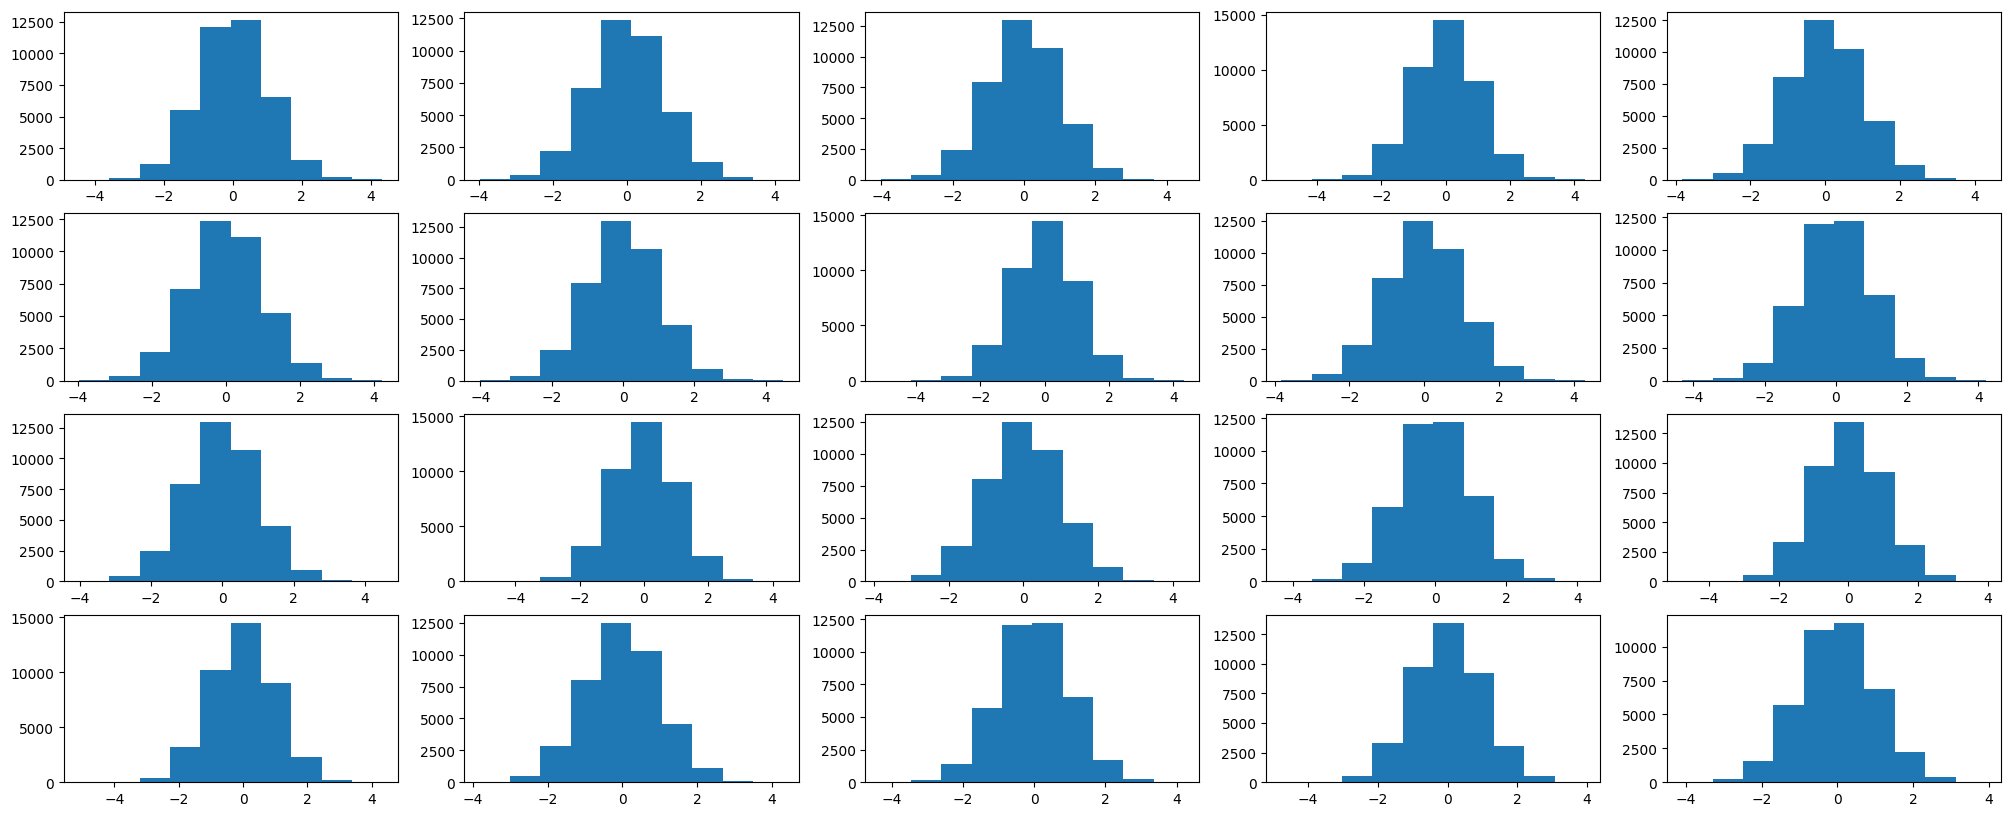

In [11]:
fig,ax=plt.subplots(nrows=4,ncols=5,figsize=(25,10))
for i in range(4):
    for j in range(5):
        ax[i,j].hist(model.X_train[:,i+j])

Initial Cost: 65588462.58640014
Cost after iteration 10: 53613079.59277713
Cost after iteration 20: 43824711.076239966
Cost after iteration 30: 35823859.80500526
Cost after iteration 40: 29284020.55879289
Cost after iteration 50: 23938340.74132885
Cost after iteration 60: 19568719.336923376
Cost after iteration 70: 15996898.398701211
Cost after iteration 80: 13077182.784090009
Cost after iteration 90: 10690490.468414161
Cost after iteration 100: 8739490.19829093


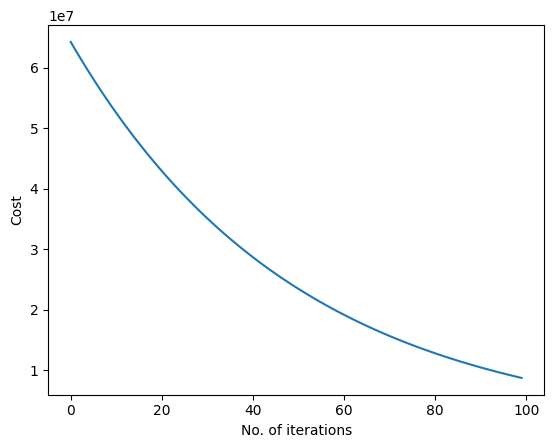

In [25]:
model=Linear_Regression(train_data,0.8,0.1)
model.gradient_descent(alpha=0.01,num_iters=100)
model.plot_cost()

Initial Cost: 65683803.199869424
Cost after iteration 10: 7935245.092601088
Cost after iteration 20: 960363.0878786773
Cost after iteration 30: 116431.09442165385
Cost after iteration 40: 14139.877981020876
Cost after iteration 50: 1720.087435311166
Cost after iteration 60: 209.5918959747165
Cost after iteration 70: 25.583456930261576
Cost after iteration 80: 3.1315692456537967
Cost after iteration 90: 0.3877941381439854
Cost after iteration 100: 0.05197259907949041


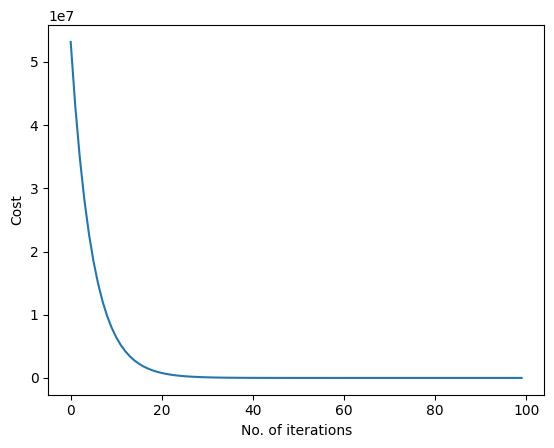

In [9]:
model=Linear_Regression(train_data,0.8,0.1)
model.gradient_descent(alpha=0.1,num_iters=100)
model.plot_cost()

Initial Cost: 65549750.44730132
Cost after iteration 10: 104303564.15227072
Cost after iteration 20: 232314779.86741486
Cost after iteration 30: 652284804.7406893
Cost after iteration 40: 2118157064.5678825
Cost after iteration 50: 7459664741.863118
Cost after iteration 60: 27446217639.130463
Cost after iteration 70: 103505899532.34535
Cost after iteration 80: 396279874264.3719
Cost after iteration 90: 1532379720017.5852
Cost after iteration 100: 5966926621370.661


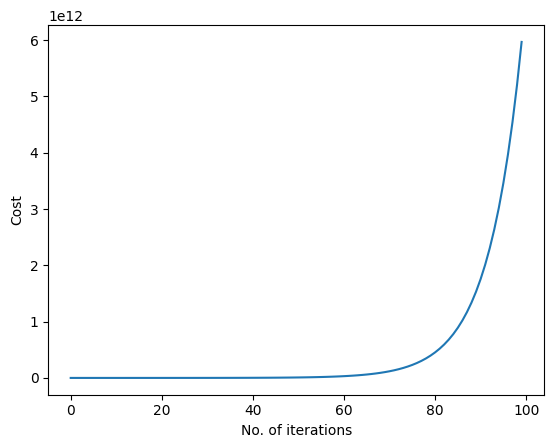

In [21]:
model=Linear_Regression(train_data,0.8,0.1)
model.gradient_descent(alpha=2,num_iters=100)
model.plot_cost()

Initial Cost: 65731617.15381783
Cost after iteration 10: 0.005078585402287642
Cost after iteration 20: 0.005078585402287006
Cost after iteration 30: 0.005078585402287006
Cost after iteration 40: 0.005078585402287006
Cost after iteration 50: 0.005078585402287006
Cost after iteration 60: 0.005078585402287006
Cost after iteration 70: 0.005078585402287006
Cost after iteration 80: 0.005078585402287006
Cost after iteration 90: 0.005078585402287006
Cost after iteration 100: 0.005078585402287006


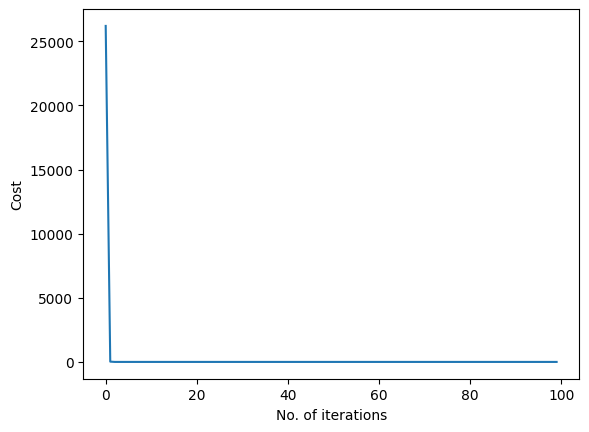

In [16]:
model=Linear_Regression(train_data,0.8,0.1)
model.gradient_descent(alpha=1,num_iters=100)
model.plot_cost()

In [17]:
model.ytrain_pred=model.prediction(model.X_train)
model.ycv_pred=model.prediction(model.X_cv)
model.ytest_pred=model.prediction(model.X_test)

In [18]:
print(f'Cost for cross validation dataset: {model.cost(model.X_cv,model.y_cv)}')

Cost for cross validation dataset: 0.00490850113873416


In [19]:
print(f'Cost for test dataset: {model.cost(model.X_test,model.y_test)}')

Cost for test dataset: 0.004976562444356282


In [20]:
print(f'R^2 Score for training dataset: {model.R2_score(model.y_train,model.ytrain_pred)}')
print(f'R^2 Score for cross validation dataset: {model.R2_score(model.y_cv,model.ycv_pred)}')
print(f'R^2 Score for test dataset: {model.R2_score(model.y_test,model.ytest_pred)}')

R^2 Score for training dataset: 0.9999999999227287
R^2 Score for cross validation dataset: 0.9999999999249686
R^2 Score for test dataset: 0.9999999999221306


In [27]:
test_data=pd.read_csv('Lineardata_test.csv')
test_data.head()

,ID,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
0,14189,0.634260,-0.771727,4.297694,-2.022710,0.487001,2.316767,11.626397,-10.657142,9.254734,...,-8.728623,7.035966,5.828558,8.596358,-16.510202,-132.396813,12.213839,21.383123,-37.841857,18.892385
1,14742,0.456128,3.154433,0.182006,-0.730634,-5.759530,1.448589,-10.292540,20.441249,9.943525,...,-4.899841,20.762134,-4.117988,-12.677107,-40.923007,367.557009,21.607952,-1.207279,-28.154185,-3.603744
2,13905,0.390815,-5.278284,1.625943,-1.775914,-2.461865,1.439888,6.213269,-17.212310,-17.308743,...,8.239316,6.588928,27.017658,-1.806317,-18.574372,-39.807081,-18.389553,7.466803,49.904659,46.990062
3,10072,1.067949,4.851061,3.909243,2.005500,2.880720,1.054944,-1.652801,-4.267849,3.860784,...,-4.580152,5.748974,6.949329,-2.369054,-6.953435,23.932892,-1.575264,-34.352606,16.941476,5.104177
4,14879,-0.589611,-3.533016,-1.705736,2.063013,-0.738696,2.475443,-4.982819,-19.693204,0.660739,...,2.222820,-11.731821,-8.069874,-5.881325,-26.060090,244.017215,-23.257490,9.819982,-34.672912,9.324556


In [28]:
test_x=test_data.iloc[:,1:].to_numpy()
test_x=(test_x-model.mean)/model.std

In [30]:
test_y=model.prediction(test_x)

In [31]:
df = pd.DataFrame({'ID': test_data.iloc[:,0], 'label': test_y})
df.to_csv('result_linear.csv')